# Mandril
The mandril algorithm is a merging of maxent and maml.

### Imports

In [1]:
import utils
from agent import Agent
import solver as Solver
from maml import maml
from maml import maml_iteration

import numpy as np
import matplotlib.pyplot as plt
import time

### Parameters

In [2]:
size = 10
p_slip = 0.0
N = 100
batch_size = 10
meta_lr = 0.1
terminal = None

### Run Mandril

In [3]:
startTime = time.time()
data_20_meta = maml(N, batch_size, meta_lr, size, p_slip)
executionTime = (time.time() - startTime)

In [4]:
print('Theta: {0}'.format(data_20_meta["thetas"][-1]))
print("mean validations per tenths:")
print([np.round(np.mean(data_20_meta["policy_score"][int(N / 10) * i :
    int(N / 10) * (i + 1)]), 2) for i in range(10)])
print("Regular maxent:")
print([np.round(np.mean(data_20_meta["reg_policy_score"][int(N / 10) * i :
    int(N / 10) * (i + 1)]), 2) for i in range(10)])
print('Total execution time: {0} (sec)'.format(executionTime))

Theta: [0.01090664 0.00890922 0.00683146 0.00809755 0.00690215 0.01104605
 0.01744841 0.01337013 0.01007457 0.01986571 0.01059203 0.00911005
 0.00649104 0.00706341 0.00801958 0.01137352 0.01250364 0.01065575
 0.01026553 0.01491382 0.01208094 0.01219923 0.00802836 0.00743077
 0.00852555 0.00750307 0.00763916 0.00989313 0.01181045 0.00988809
 0.00820822 0.01170841 0.01071226 0.00764676 0.00949812 0.00758048
 0.00642963 0.00901799 0.00875521 0.00732624 0.0085848  0.01345427
 0.01784918 0.01006149 0.00967467 0.00812004 0.00819912 0.01185562
 0.01010662 0.00619505 0.00827306 0.01027645 0.01257698 0.0085603
 0.0098295  0.00990621 0.01130222 0.012684   0.0089318  0.0067113
 0.00820538 0.00792489 0.00825607 0.00715142 0.00746313 0.0061712
 0.00707586 0.00863323 0.00979275 0.01127286 0.00824346 0.00923312
 0.00843807 0.00952036 0.0098056  0.00694023 0.00968855 0.01476641
 0.01681817 0.01463125 0.00679639 0.00939208 0.00833379 0.00702227
 0.00750218 0.00706782 0.01120867 0.01800368 0.02337644 0.

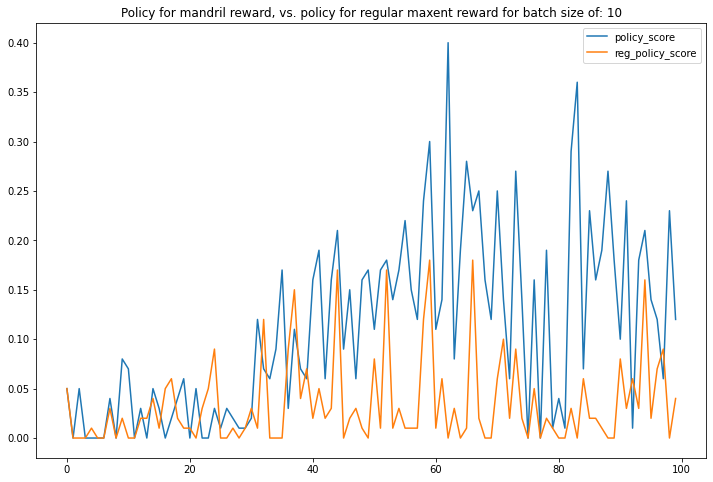

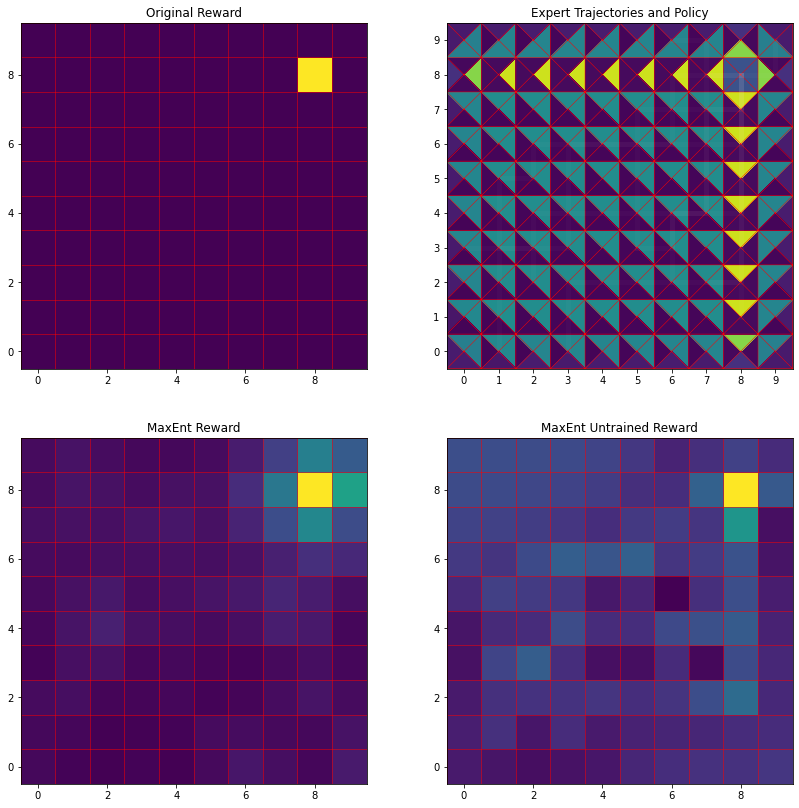

In [5]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_20_meta["policy_score"], data_20_meta["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
plt.show()

# show iteration:
maml_iteration(
    batch_size,
    data_20_meta["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

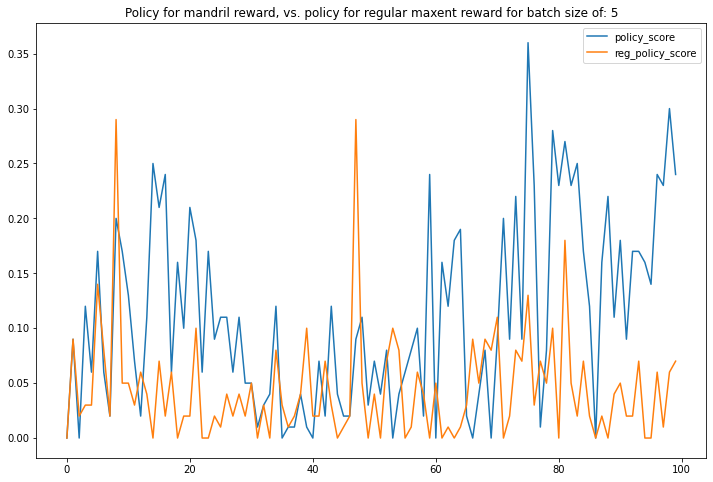

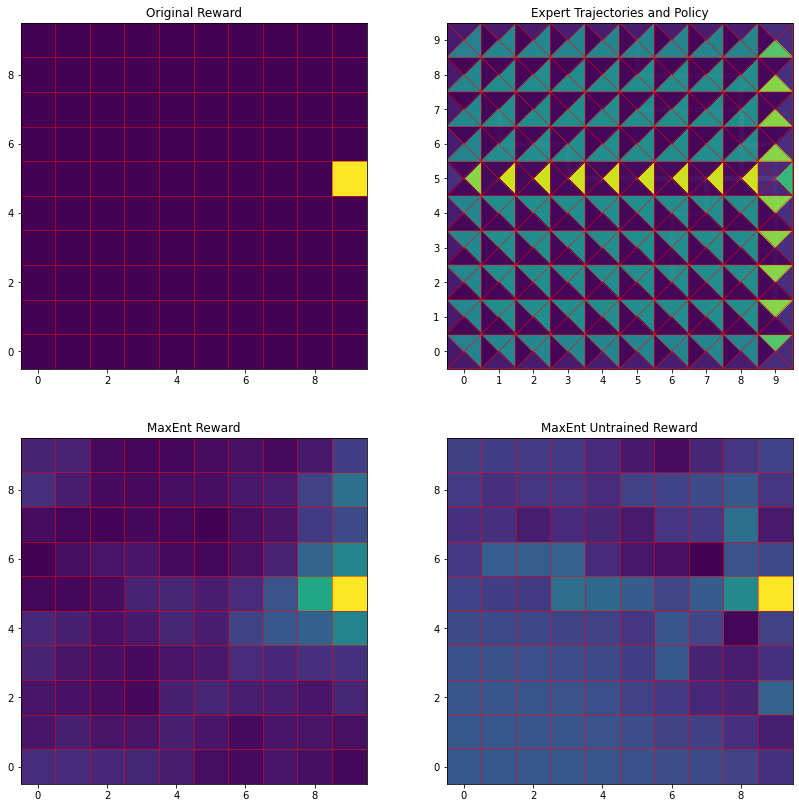

In [6]:
startTime = time.time()
old_batch_size = batch_size
batch_size = 5
data_5_meta = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_5_meta["policy_score"], data_5_meta["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
plt.show()

# fig = plt.figure(figsize=(12,8))
# plt.plot(range(N), data_5_meta["validation_score"], data_5_meta["regular_score"])
# plt.legend(["validation_score", "regular_score"])
# plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
# plt.show()

maml_iteration(
    batch_size,
    data_5_meta["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

batch_size = old_batch_size

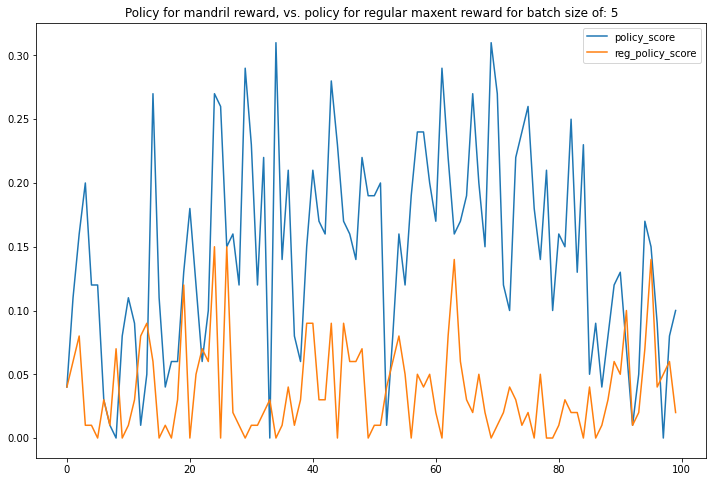

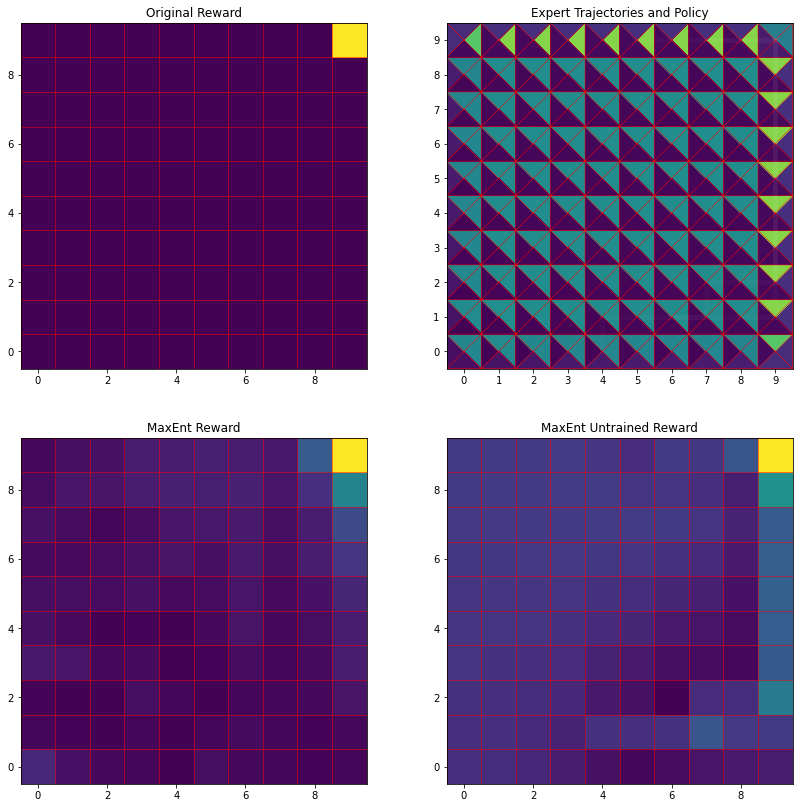

In [7]:
old_terminal = terminal
terminal = size**2 - 1
old_batch_size = batch_size
batch_size = 5
data_const_terminal = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_const_terminal["policy_score"], data_const_terminal["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
plt.show()

maml_iteration(
    batch_size,
    data_const_terminal["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

terminal = old_terminal
batch_size = old_batch_size

### Plot the different options

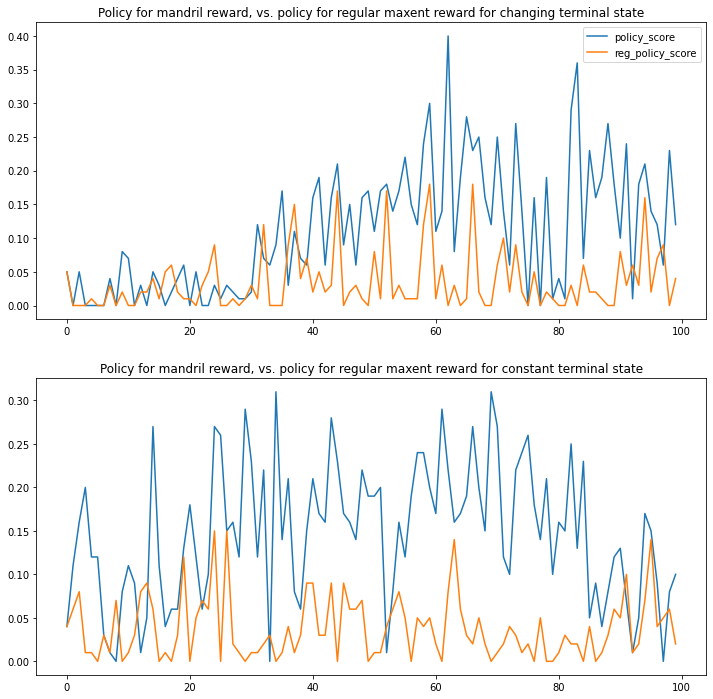

In [8]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(211)
ax.plot(range(N), data_20_meta["policy_score"], data_20_meta["reg_policy_score"])
ax.legend(["policy_score", "reg_policy_score"])
ax.set_title("Policy for mandril reward, vs. policy for regular maxent reward for changing terminal state")

ax = fig.add_subplot(212)
ax.plot(range(N), data_const_terminal["policy_score"], data_const_terminal["reg_policy_score"])
ax.set_title("Policy for mandril reward, vs. policy for regular maxent reward for constant terminal state")
plt.show()

## Add slippage

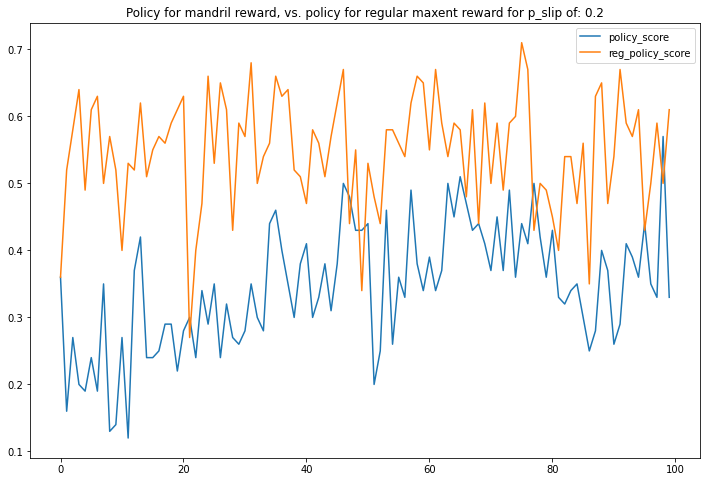

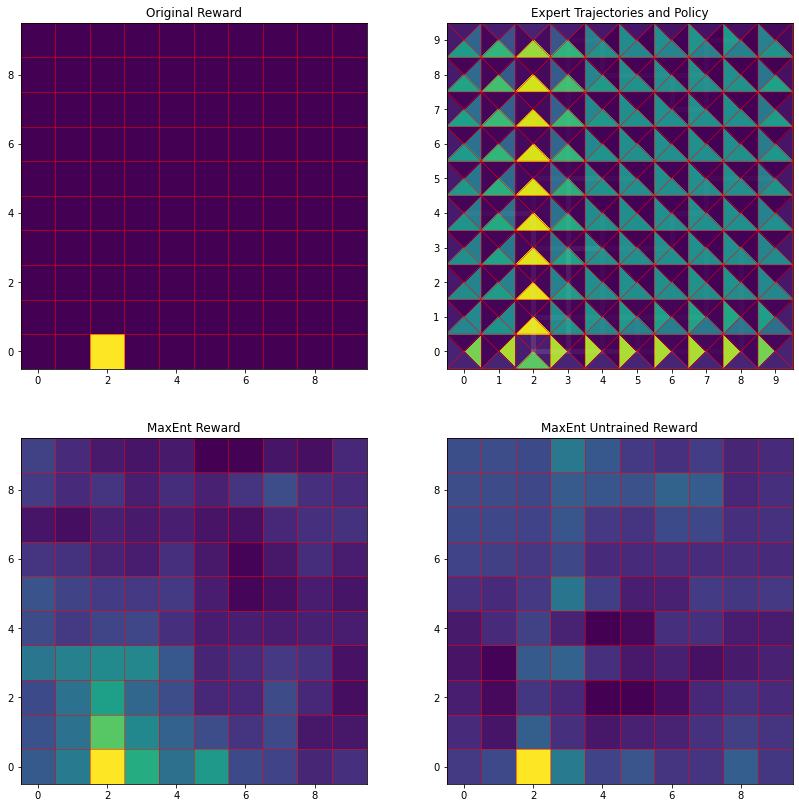

In [9]:
p_slip = 0.2
data_02_slip = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_02_slip["policy_score"], data_02_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_02_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

p_slip = 0.0

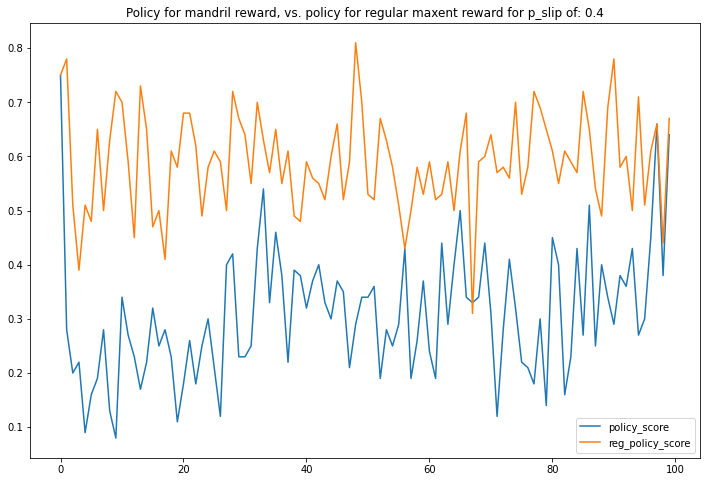

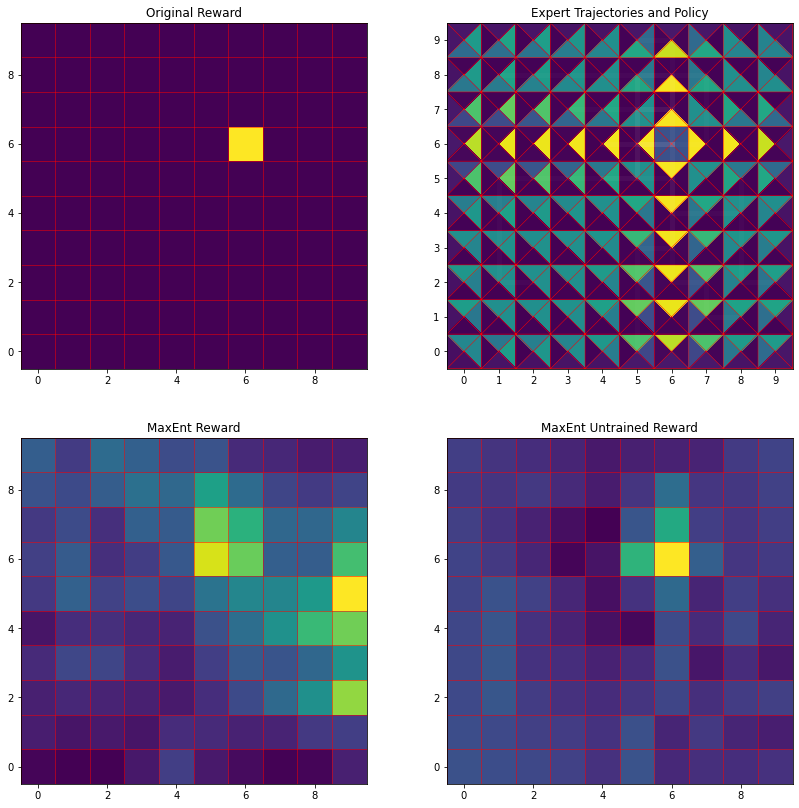

In [10]:
p_slip = 0.4
data_02_slip = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_02_slip["policy_score"], data_02_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_02_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

p_slip = 0.0

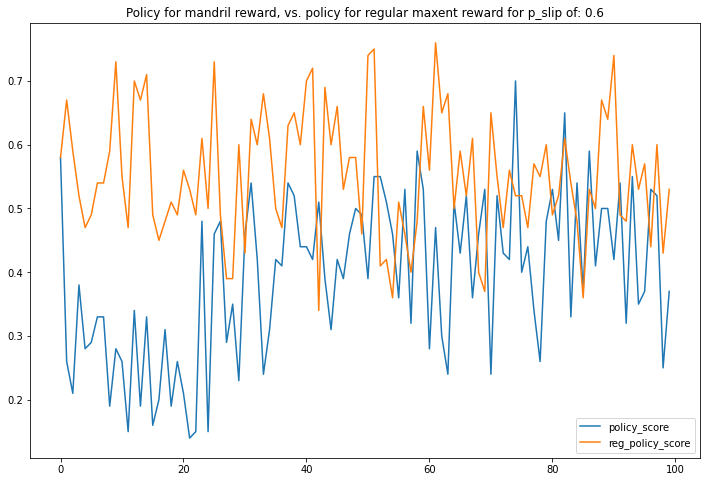

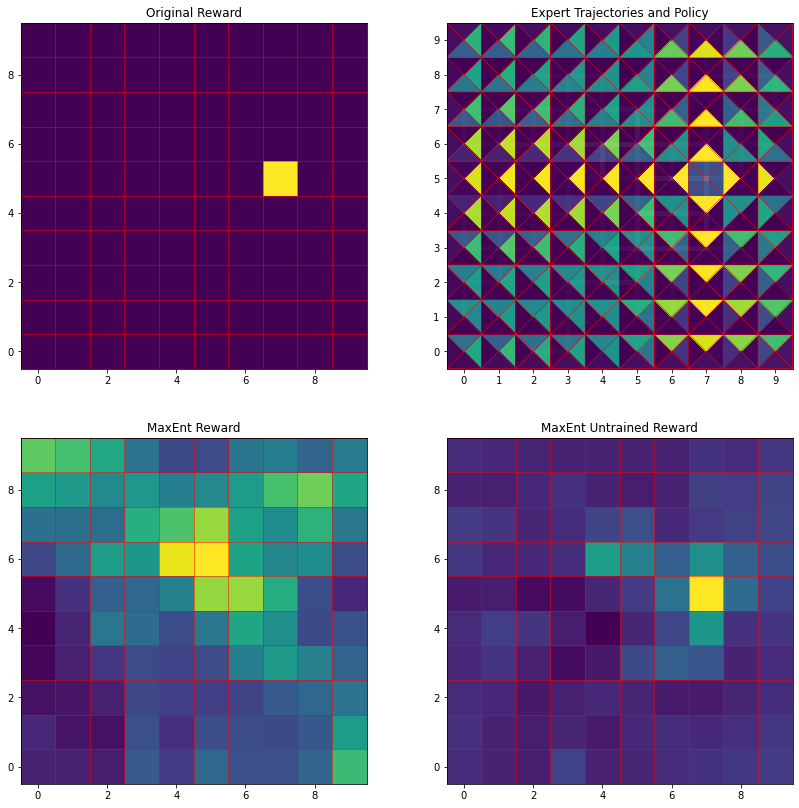

In [11]:
p_slip = 0.6
data_02_slip = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_02_slip["policy_score"], data_02_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_02_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

p_slip = 0.0

## Train maxEnt on the same number of trajectories, but all at once:

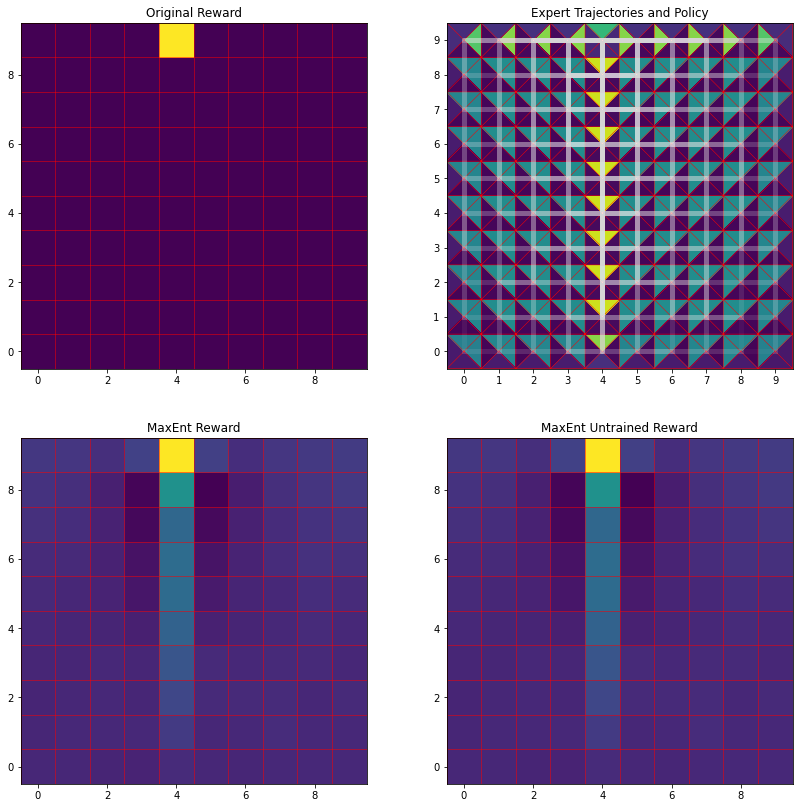

In [12]:
theta, reward, maml_reward, reg_reward, world = maml_iteration(
    batch_size=N*batch_size,
    theta=None,
    meta_lr=meta_lr,
    size=size,
    p_slip=p_slip,
    terminal=terminal,
    discount=0.7,
    draw=True
)